In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("all imports successful")

all imports successful


In [2]:
practice_list = list(range(1,11))
print(practice_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [11]:
# filter for even numbers, square each

# method 1 - without list comprehension
even_list = []
for num in practice_list:
    if num % 2 == 0:
        even_list.append(num)

squared_list = []
for num in even_list:
    squared_list.append(num**2)

print(even_list)
print(squared_list)

# method 2 - with list comprehnsion
odd_squared = [num**2 for num in practice_list if num%2==1]
print(odd_squared)

[2, 4, 6, 8, 10]
[4, 16, 36, 64, 100]
[1, 9, 25, 49, 81]


In [14]:
array = np.array(practice_list)
print(array)
print(array.mean())
print(f"{array.std():.3f}")

[ 1  2  3  4  5  6  7  8  9 10]
5.5
2.872


In [15]:
df = pd.read_csv('../../data/raw/listings.csv')
df.shape

(15187, 79)

In [18]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2911
Length: 79, dtype: int64

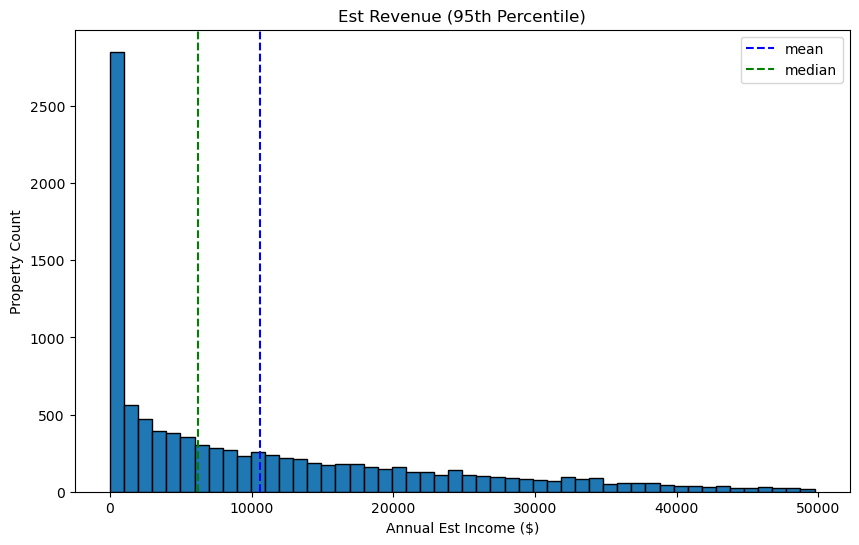

In [23]:
# Get 95th percentile (cut off top 5% outliers)
upper_limit = df['estimated_revenue_l365d'].quantile(0.95)

# Filter for visualization
viz_data = df[df['estimated_revenue_l365d'] <= upper_limit]['estimated_revenue_l365d']


plt.figure(figsize=(10,6))
plt.hist(viz_data, bins=50, edgecolor='black')
plt.axvline(viz_data.mean(), color='blue', linestyle='--', label='mean')
plt.axvline(viz_data.median(), color='green', linestyle='--', label='median')
plt.title('Est Revenue (95th Percentile)')
plt.xlabel('Annual Est Income ($)')
plt.ylabel('Property Count')
plt.legend()
plt.show()